# Convolutional Neural Network

# Building the CNN

In [1]:
#importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
# initialising the CNN
classifier = Sequential()

Convolution step consists of applying several feature detectors on the input image. On an input image we will use feature Detector to get a feature map. For each feature detector that we apply on the input image we get a feature map that contains  some numbers and the highest number of the feature mao is where the feature detector could detect a specific feature in the input image. 

**Packages**<br>
**Sequential :** It is used to initialize our neural network.<br>
**Convulation2D :** For adding convulation layer to image. As we are dealing with  images we use convulation 2D Package.<br> 
**MaxPooling2D :** It is used for pooling process.<br>
**Flattening :** It is used for flattening process.<br>
**Dense :** This package is used to add the fully connected layers in a classic ANN.<br>


# step 1 - Convolution

In [3]:
classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation='relu'))

C:\Users\Samir\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.


Parameters fror Convolution2D()<br>
no_of_feature_maps,no_of_rows,no_of_columns,input_shape=()<br>
no_of_features is the number of filters to be used.<br>
input_shape -> All our images don't have the same size and format and therefore we need to force them in some way having the same formats.That means we will convert all our images into one same single format and fixed size.<br>
input_shape first argument is the no. of channels i.e. either 1 or 0, 0 for black and white images.<br>
In tensorflow the order is size,size,channel whereas in the theano the order is size,size,channel.

**Why we will use `rectifier` activation function ?**<br>
To make sure that we don't have any negative pixel values in our feature maps depending on the parameters that we use for our convolution operation we can get something out of pixel in the feature map and we need to remove these negative pixels in order to have non-linearity in our convolutional neural network. As we know that classifying some images is a non linear problem so we need to non-linearity in our model. 

# Step 2 - Pooling
It is basically reducing the size of the feature map.<br>
We did this to reduce the number of nodes.

In [4]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

We will move the pooling table with the stride of 2.<br>
ex. taking first two columns and then the next two colums.<br>

# Adding a second convolution layer 

In [5]:
classifier.add(Convolution2D(32,3,3,activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

C:\Users\Samir\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


# Step 3 - Flattening


In [6]:
classifier.add(Flatten())
#This method will automatically take care of the previous layers.

1. Why don't we lose spatial structure by flattening all these feature maps into one same single vector ?<br>
It is so because by creating our feature maps we extracted the spatial structure informations by getting those high numbers in the feature map. These high numbers in the feature maps are associated to a specific feature in the input image. And since we apply max pooling step we keep these high numbers, and the flattening consists of putting all the numbers in the cells of the feature maps into one single vector.
2. Why didn't we directly take all pixels of the input image and flatten them into one single  vector without applying the previous steps of the convolutional step?<br>
This is so because if we directly flatten the input image pixels into this huge single one dimensional vector then `each node` of this huge vector will represent `1 pixel of the image`, independently of the pixels that are around it. So we only get information of the pixel itself and we don't get informations of how this pixel are spatially connected to the other pixel around it. 

# Step-4 Full Connection

In [7]:
classifier.add(Dense(units=128,activation='relu',))

In [8]:
classifier.add(Dense(units=1,activation='sigmoid'))

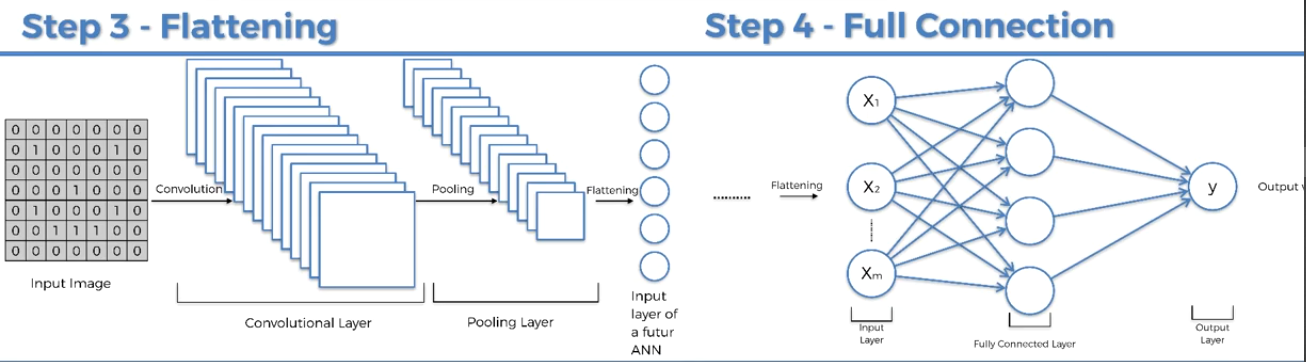

In [9]:
from IPython.display import Image
Image(filename="images\\image11.png")

The image depicts the step done above.

# Compiling the CNN

In [10]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Part 2 - Fitting the CNN to the images

We will perform a process called image augmentation.<br>
Image Augmentation basically consists of preprocessing the images to prevent overfitting.<br>
Image Augmentation will create many batches of our images and to each batchit will apply some random transformation on a random selection of our image. It trsnsforms images by rotating, shearing, flipping etc..  <br><br>
transformations :<br>
shearing :- It is geometrical transformation that is also called transvection where the pixel are moved to a fixed direction over a proportional distance over a line that is parallel to the direction they are moving. 

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'Dataset\\dataset\\training_set',
        target_size=(64, 64),#Size of images expected in the CNN model
        batch_size=32,#Size of batches in which some random sample of images will be included
                      #And that contains the no. of images that will go through the CNN after which 
                      #the weights will be updated.
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        'Dataset\\dataset\\test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')
                                        #Source : Keras documentation

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [13]:
classifier.fit_generator(
        train_generator,
        steps_per_epoch=8000,#No of images in training  set
        epochs=25,
        validation_data=test_set,#we will do validation on the test set
        validation_steps=2000)

Epoch 1/25
8000/8000 [==============================] - 2443s 305ms/step - loss: 0.3691 - accuracy: 0.8267 - val_loss: 0.1985 - val_accuracy: 0.7951
Epoch 2/25
8000/8000 [==============================] - 2473s 309ms/step - loss: 0.1114 - accuracy: 0.9575 - val_loss: 1.4084 - val_accuracy: 0.7822
Epoch 3/25
8000/8000 [==============================] - 4740s 593ms/step - loss: 0.0535 - accuracy: 0.9811 - val_loss: 1.8419 - val_accuracy: 0.7768
Epoch 4/25
8000/8000 [==============================] - 3344s 418ms/step - loss: 0.0389 - accuracy: 0.9867 - val_loss: 2.3576 - val_accuracy: 0.7896
Epoch 5/25
8000/8000 [==============================] - 2610s 326ms/step - loss: 0.0299 - accuracy: 0.9898 - val_loss: 1.0063 - val_accuracy: 0.7923
Epoch 6/25
8000/8000 [==============================] - 2440s 305ms/step - loss: 0.0259 - accuracy: 0.9915 - val_loss: 2.7197 - val_accuracy: 0.7964
Epoch 7/25
8000/8000 [==============================] - 2681s 335ms/step - loss: 0.0222 - accuracy: 0.9927

So accuracy for the training set is `0.9975` and `0.7914` for the test set.

